In [1]:
import torch
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
from models import *
from dataset import MyCelebA

In [2]:
path = r"logs\VanillaVAE\version_0\checkpoints\last.ckpt"

model = VanillaVAE(3, 512)
file = torch.load(path)
parsed_file = {k.replace('model.', ''): v for k, v in file['state_dict'].items()}
model.load_state_dict(parsed_file)

<All keys matched successfully>

In [3]:
import pandas as pd

attrs = pd.read_csv('data/celeba/list_attr_celeba.txt', sep=r'\s+', header=1, index_col=0)
print(list(enumerate(attrs.columns)))

print((attrs == 1).sum() / len(attrs))

[(0, '5_o_Clock_Shadow'), (1, 'Arched_Eyebrows'), (2, 'Attractive'), (3, 'Bags_Under_Eyes'), (4, 'Bald'), (5, 'Bangs'), (6, 'Big_Lips'), (7, 'Big_Nose'), (8, 'Black_Hair'), (9, 'Blond_Hair'), (10, 'Blurry'), (11, 'Brown_Hair'), (12, 'Bushy_Eyebrows'), (13, 'Chubby'), (14, 'Double_Chin'), (15, 'Eyeglasses'), (16, 'Goatee'), (17, 'Gray_Hair'), (18, 'Heavy_Makeup'), (19, 'High_Cheekbones'), (20, 'Male'), (21, 'Mouth_Slightly_Open'), (22, 'Mustache'), (23, 'Narrow_Eyes'), (24, 'No_Beard'), (25, 'Oval_Face'), (26, 'Pale_Skin'), (27, 'Pointy_Nose'), (28, 'Receding_Hairline'), (29, 'Rosy_Cheeks'), (30, 'Sideburns'), (31, 'Smiling'), (32, 'Straight_Hair'), (33, 'Wavy_Hair'), (34, 'Wearing_Earrings'), (35, 'Wearing_Hat'), (36, 'Wearing_Lipstick'), (37, 'Wearing_Necklace'), (38, 'Wearing_Necktie'), (39, 'Young')]
5_o_Clock_Shadow       0.111136
Arched_Eyebrows        0.266981
Attractive             0.512505
Bags_Under_Eyes        0.204572
Bald                   0.022443
Bangs                  0.

In [4]:
male_indices = pd.Series(attrs[attrs.Male == 1].index)
male_indices = list(male_indices.str.replace('.jpg', '').astype(int) - 1)

smiling_indices = pd.Series(attrs[attrs.Smiling == 1].index)
smiling_indices = list(smiling_indices.str.replace('.jpg', '').astype(int) - 1)

attractive_indices = pd.Series(attrs[attrs.Attractive == 1].index)
attractive_indices = list(attractive_indices.str.replace('.jpg', '').astype(int) - 1)

In [5]:
from torchvision import transforms
tf = transforms.Compose([transforms.CenterCrop(148),
                        transforms.Resize(64),
                        transforms.ToTensor(),])

celeba_images = MyCelebA(root='data', target_type='attr', transform=tf)

In [28]:
print(celeba_images[0])
attrs[0:10]

(tensor([[[0.9843, 0.9843, 0.9882,  ..., 0.4118, 0.4471, 0.6353],
         [0.9882, 0.9843, 0.9882,  ..., 0.3882, 0.5020, 0.6471],
         [0.9882, 0.9882, 0.9882,  ..., 0.4980, 0.4980, 0.6706],
         ...,
         [0.5333, 0.5490, 0.5765,  ..., 0.2510, 0.2549, 0.5373],
         [0.5294, 0.5765, 0.6275,  ..., 0.2471, 0.2275, 0.5490],
         [0.5137, 0.5804, 0.6078,  ..., 0.2902, 0.2627, 0.5137]],

        [[0.9255, 0.9333, 0.9373,  ..., 0.2196, 0.2549, 0.4824],
         [0.9373, 0.9333, 0.9373,  ..., 0.1922, 0.3098, 0.5059],
         [0.9333, 0.9373, 0.9373,  ..., 0.3098, 0.3137, 0.5216],
         ...,
         [0.3059, 0.3137, 0.3490,  ..., 0.0863, 0.1216, 0.3608],
         [0.3020, 0.3373, 0.3843,  ..., 0.0706, 0.0980, 0.3686],
         [0.2863, 0.3412, 0.3569,  ..., 0.0980, 0.1216, 0.3373]],

        [[0.7961, 0.8000, 0.8039,  ..., 0.1176, 0.1373, 0.3255],
         [0.8078, 0.8039, 0.8078,  ..., 0.1020, 0.1882, 0.3137],
         [0.8078, 0.8118, 0.8118,  ..., 0.2196, 0.1922, 0

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
000007.jpg,1,-1,1,1,-1,-1,1,1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
000008.jpg,1,1,-1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1
000010.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [42]:
from torch.utils.data import DataLoader
import tqdm

model = model.to('cuda')  # Move to GPU if available
model.eval()  # Set the model to evaluation mode

sunglasses_loader = DataLoader(celeba_images, batch_size=1024, pin_memory=True, num_workers=6)

# Prepare the data
def extract_latent_features(loader, model):
    features = []
    labels = []
    for batch in tqdm.tqdm(loader):
        images, batch_labels = batch
        batch_labels = batch_labels.numpy()[: , [20, 31]]
        images = images.to('cuda')  # Move to GPU if available

        with torch.no_grad():
            # Pass through encoder and reparameterization
            mu, log_var = model.encode(images)
            z = model.reparameterize(mu, log_var)

        features.append(z.cpu().numpy())
        labels.append(batch_labels)

    return np.vstack(features), np.vstack(labels)

features, labels = extract_latent_features(sunglasses_loader, model)

100%|██████████| 159/159 [00:38<00:00,  4.16it/s]


0
Accuracy for class 0: 0.75
1
Accuracy for class 1: 0.77


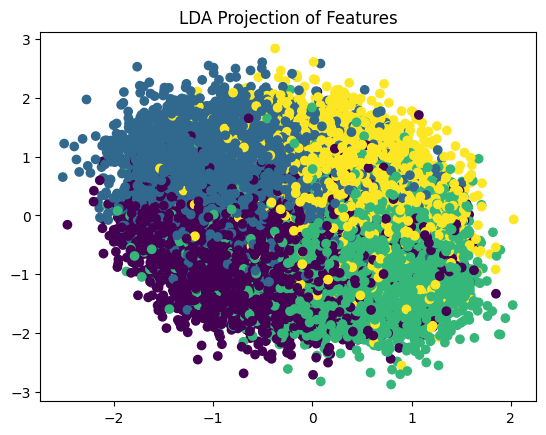

In [57]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_2d_lda_projection(X, y, title):
    X_lda = np.zeros((X.shape[0], 2))
    coefs = np.zeros((X.shape[1], 2))
    ints = np.zeros(2,)
    for i in range(2):
        print(i)
        svc = LinearSVC()
        svc.fit(X, y[:, i])
        coefs[:, i] = svc.coef_[0]
        ints[i] = svc.intercept_[0]
        X_lda[:, i] = X @ coefs[:, i].T + ints[i]

        accuracy = accuracy_score(y[:, i], svc.predict(X))
        print(f"Accuracy for class {i}: {accuracy:.2f}")

    fig = plt.figure()
    ax = fig.add_subplot()
    y_num = 2 * y[:, 0] + 1 * y[:, 1]
    ax.scatter(X_lda[:, 0], X_lda[:, 1], c=y_num, cmap='viridis', marker='o')
    ax.set_title(title)
    plt.show()
    return coefs, ints

coefs, ints = plot_2d_lda_projection(features, labels, "LDA Projection of Features")

In [52]:
from IPython import display
from PIL import Image

# display(None)

im = celeba_images[0][0].numpy()

Image.fromarray(im[0]*255).show()

input = torch.tensor(im[np.newaxis, :, :])
latent = model.encode(input.to('cuda'))

latent = model.reparameterize(latent[0], latent[1]).cpu().detach().numpy()

latent_edited = latent + coefs[:, 0] * 5

reconstructed_image = model.decode(torch.tensor(latent).to('cuda')).cpu().detach().numpy()
Image.fromarray(final_image[0,0] * 255).show()

Generating 9x9 grid of images...
Image generation complete.


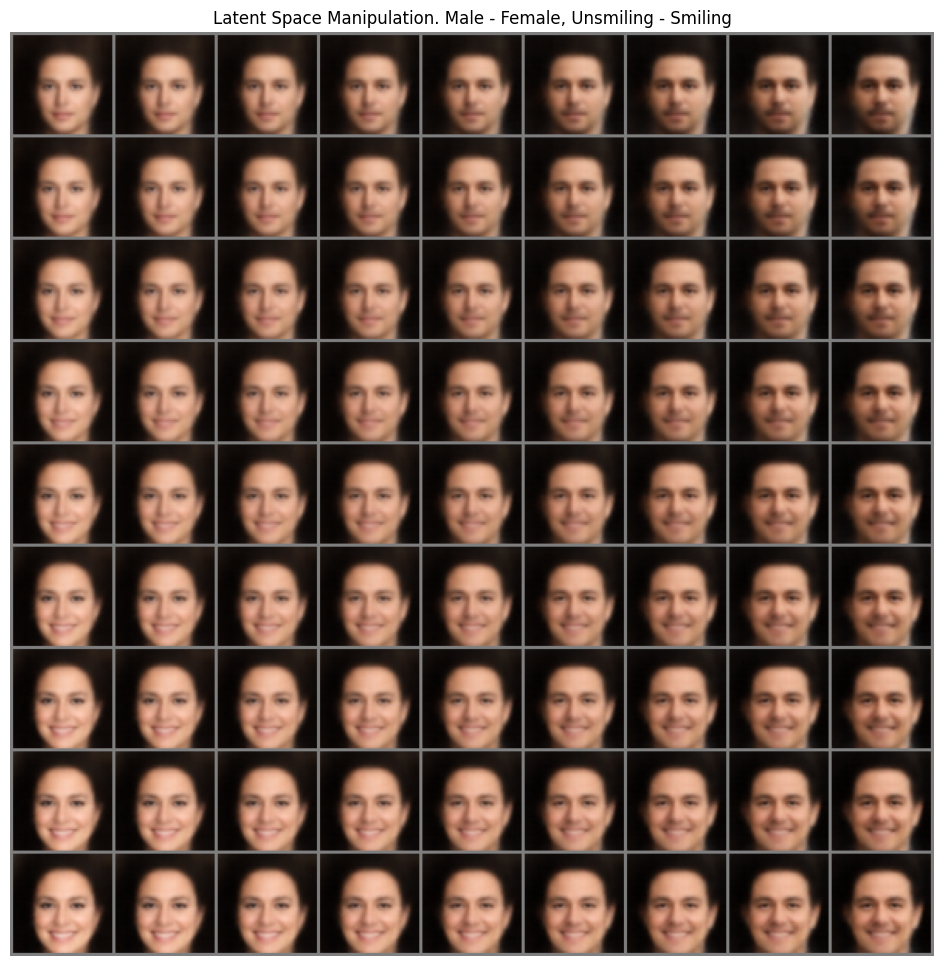

In [58]:

import torch
import torchvision.utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Ensure model is in evaluation mode
model.eval()

# 1. Select an initial image
img_tensor = celeba_images[15][0]
img_arr = img_tensor.numpy().transpose(1, 2, 0)
img_arr_uint8 = (img_arr * 255).clip(0, 255).astype(np.uint8)
Image.fromarray(img_arr_uint8).show()

# Ensure image tensor is in the expected shape (C, H, W) and add batch dimension for the model
if img_tensor.ndim == 4 and img_tensor.shape[0] == 1: # Already (1, C, H, W)
    input_tensor = img_tensor.to('cuda')
elif img_tensor.ndim == 3: # (C, H, W)
    input_tensor = img_tensor.unsqueeze(0).to('cuda')
else:
    # Attempt to process if it's a numpy array based on previous logic
    temp_img = img_tensor.numpy() if isinstance(img_tensor, torch.Tensor) else img_tensor
    if temp_img.ndim == 4 and temp_img.shape[0] == 1 : # (1, C, H, W) numpy
         input_tensor = torch.tensor(temp_img, dtype=torch.float32).to('cuda')
    elif temp_img.ndim == 3 : # (C, H, W) numpy
         input_tensor = torch.tensor(temp_img, dtype=torch.float32).unsqueeze(0).to('cuda')
    elif temp_img.ndim == 2 : # (H, W) numpy, assuming single channel
         input_tensor = torch.tensor(temp_img, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to('cuda')
    else:
        raise ValueError(f"Image tensor has unexpected shape: {img_tensor.shape}. Please provide a (C,H,W) or (1,C,H,W) tensor.")


# 2. Encode the image to latent space
with torch.no_grad():
    mu, log_var = model.encode(input_tensor)
    latent_base = model.reparameterize(mu, log_var) # Shape: (1, latent_dim)

# 3. Define parameters for the 2D grid manipulation
grid_size = 9  # For an 11x11 grid
strength = 2.5 # Max strength of modification along each axis. Adjust as needed.

# Scales for horizontal (coef1) and vertical (coef2) manipulation
# The middle value (index (grid_size-1)//2 = 5) will be 0.0, for the unedited center image.
scales_axis = torch.linspace(-strength, strength, grid_size).to(latent_base.device)

# Select the direction vectors from coefs
# coefs[:, 0] for horizontal (x-axis), coefs[:, 1] for vertical (y-axis)
# Ensure coefs is defined and has at least two components
if 'coefs' not in locals() or coefs is None:
    raise NameError("The 'coefs' variable is not defined. Please ensure LDA projection has been run.")
if coefs.shape[1] < 2:
    raise ValueError(f"The 'coefs' array must have at least two components (columns) for 2D manipulation, but found shape {coefs.shape}")

if isinstance(coefs, np.ndarray):
    direction_vector1 = torch.tensor(coefs[:, 0], dtype=torch.float32).to(latent_base.device)
    direction_vector2 = torch.tensor(coefs[:, 1], dtype=torch.float32).to(latent_base.device)
else: # Assuming coefs is already a tensor
    direction_vector1 = coefs[:, 0].to(latent_base.device)
    direction_vector2 = coefs[:, 1].to(latent_base.device)

# Validate dimensions
if direction_vector1.shape[0] != latent_base.shape[1] or direction_vector2.shape[0] != latent_base.shape[1]:
    raise ValueError("Mismatch in latent dimension and coefficient vector dimension.")

# 4. Generate images for the grid
all_generated_images = []
print(f"Generating {grid_size}x{grid_size} grid of images...")

for scale_v in scales_axis:  # Vertical manipulation (y-axis, using coefs[:, 1])
    row_images = []
    for scale_h in scales_axis:  # Horizontal manipulation (x-axis, using coefs[:, 0])
        # The center of the grid will have scale_v=0 and scale_h=0
        modified_latent = latent_base + (direction_vector1 * scale_h) + (direction_vector2 * scale_v)
        
        with torch.no_grad():
            decoded_image = model.decode(modified_latent)
        
        # Store image (move to CPU, remove batch dimension)
        all_generated_images.append(decoded_image.cpu().squeeze(0))
print("Image generation complete.")

# 5. Create an image grid
# `normalize=True` will shift the image to the range (0, 1)
img_grid = torchvision.utils.make_grid(all_generated_images, nrow=grid_size, normalize=True, padding=2, pad_value=0.5)

# 6. Display the grid
plt.figure(figsize=(12, 12)) # Adjust size for better visualization of the square grid
plt.imshow(img_grid.permute(1, 2, 0).numpy()) # Convert from (C, H, W) to (H, W, C)
title = (f"Latent Space Manipulation. Male - Female, Unsmiling - Smiling")
plt.title(title)
plt.axis('off')
plt.show()


